In [1]:
import numpy as np 
from numpy import load
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize

import scipy 
from scipy.signal import correlate
from scipy.stats import pearsonr
import seaborn as sns


In [2]:
#try Yfull cell/signal

response_op = np.load('ProcAiryData/Yfull_op50_SF.npz')
signal_op = np.load('ProcAiryData/inpfull_op50_SF.npz')

In [3]:
response_op.keys()

KeysView(NpzFile 'ProcAiryData/Yfull_op50_SF.npz' with keys: arr_0, arr_1, arr_2, arr_3, arr_4...)

In [5]:
def sta( stimulus, response, window_size ):
    sums = np.zeros((window_size))
    for i in range(window_size -1, len(response)): # to add bigger bin size
        start_idx = i - window_size + 1
    
        weighted_response = (response[i]) * (stimulus[start_idx : i + 1] - (np.mean(stimulus[start_idx : i + 1]))) # +1 to include the current time point
        sums += weighted_response
    sta = sums/np.sum(response[window_size -1:], axis = 0)
    return sta

In [22]:
#write function to calculate for all cells in each array



num_columns = response_op['arr_6'].shape[1]

results = np.zeros((num_columns, 50))

for i in range(num_columns):
    stimulus = signal_op['arr_6'][:, 0]
    response = response_op['arr_5'][:, i]
    sta_result = sta(stimulus, response, window_size= 50)  # window_size needs to be defined or passed
    results[i, :] = sta_result


In [66]:
worm_7 = results


Text(0.5, 1.0, 'STA: Worm 7, Cell')

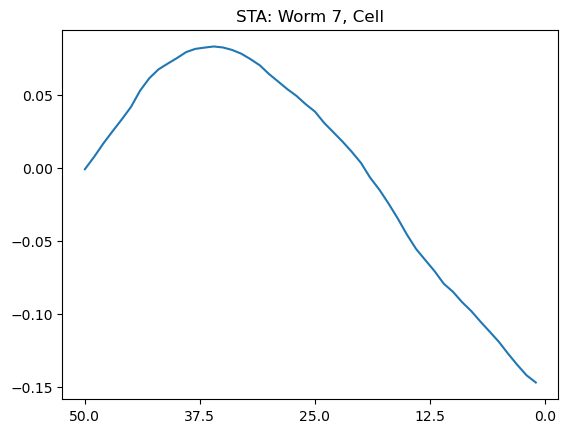

In [79]:
plt.plot(worm_7[27, :])
x_ticks = np.linspace(0, 50, 5)
x_labels = np.linspace(50, 0, 5)
plt.xticks(ticks= x_ticks, labels=x_labels) 
plt.title('STA: Worm 7, Cell')

In [69]:
#distance correlation matrix and clustering
worm_7_df = pd.DataFrame(worm_7)

In [70]:
corr = worm_7_df.corr(method='pearson')

In [71]:
distance_corr = 1- corr

/Users/iuliarusu/miniconda3/envs/HMDS/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/iuliarusu/miniconda3/envs/HMDS/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 1.0, 'Distance Correlation Matrix: Worm 7')

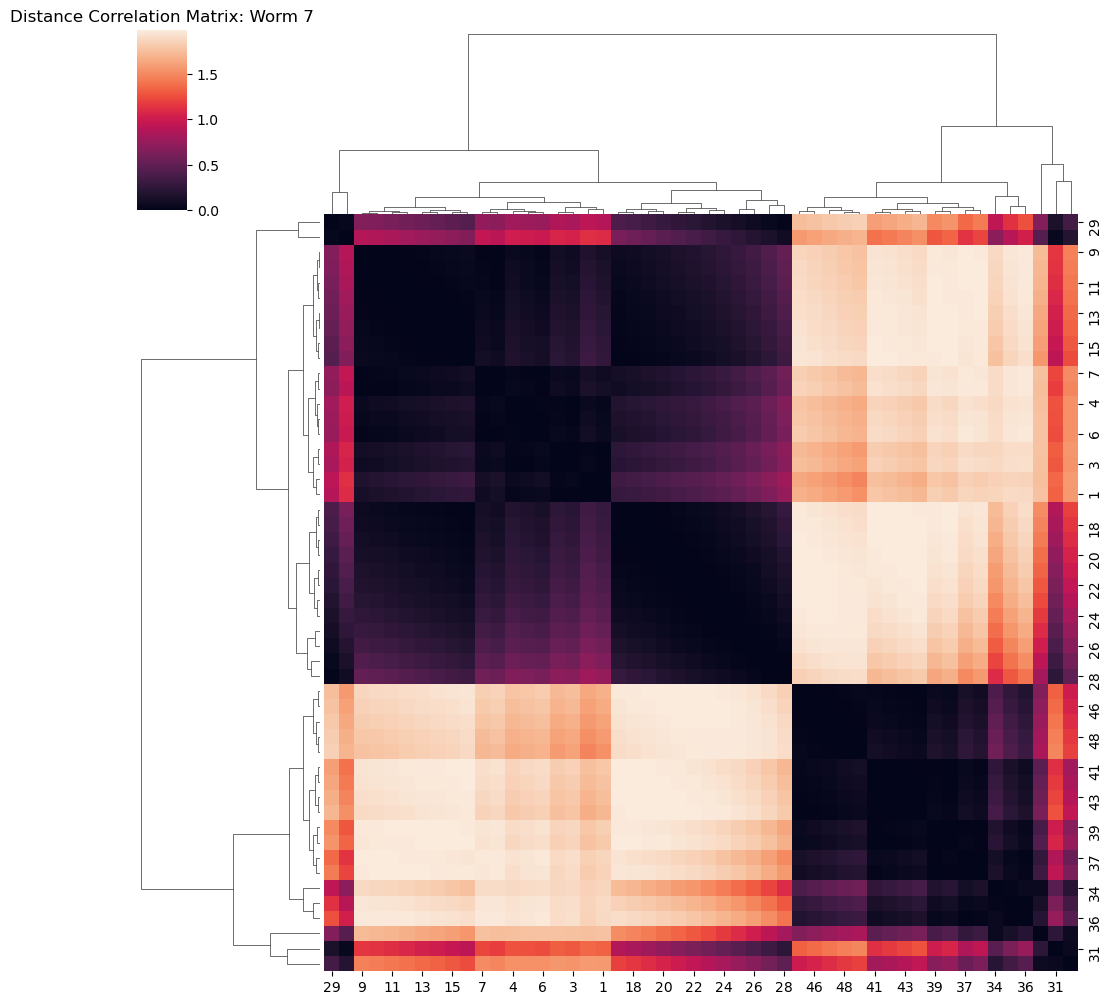

In [73]:
sns.clustermap(distance_corr)
plt.title('Distance Correlation Matrix: Worm 7')

In [75]:

num_columns = response_op['arr_6'].shape[1]

worm_6 = np.zeros((num_columns, 50))

for i in range(num_columns):
    stimulus = signal_op['arr_5'][:, 0]
    response = response_op['arr_5'][:, i]
    sta_result = sta(stimulus, response, window_size= 50)  # window_size needs to be defined or passed
    worm_6[i, :] = sta_result

/Users/iuliarusu/miniconda3/envs/HMDS/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/iuliarusu/miniconda3/envs/HMDS/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 1.0, 'Distance Correlation Matrix: Worm 6')

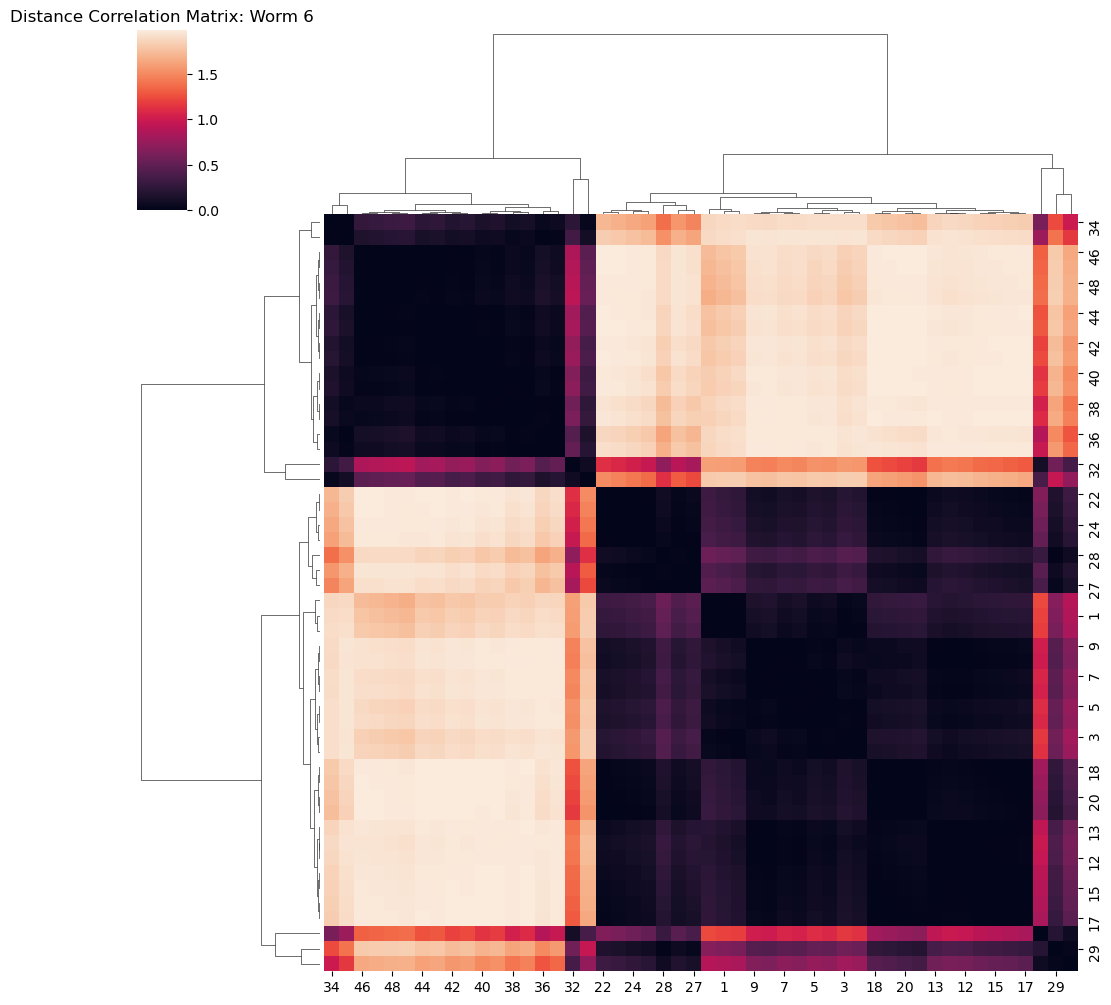

In [76]:
worm_6_df = pd.DataFrame(worm_6)
worm_6_corr = worm_6_df.corr(method='pearson')
worm_6_distance_corr = 1- worm_6_corr

sns.clustermap(worm_6_distance_corr)
plt.title('Distance Correlation Matrix: Worm 6')

/Users/iuliarusu/miniconda3/envs/HMDS/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/iuliarusu/miniconda3/envs/HMDS/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 1.0, 'Distance Correlation Matrix: Worm 5')

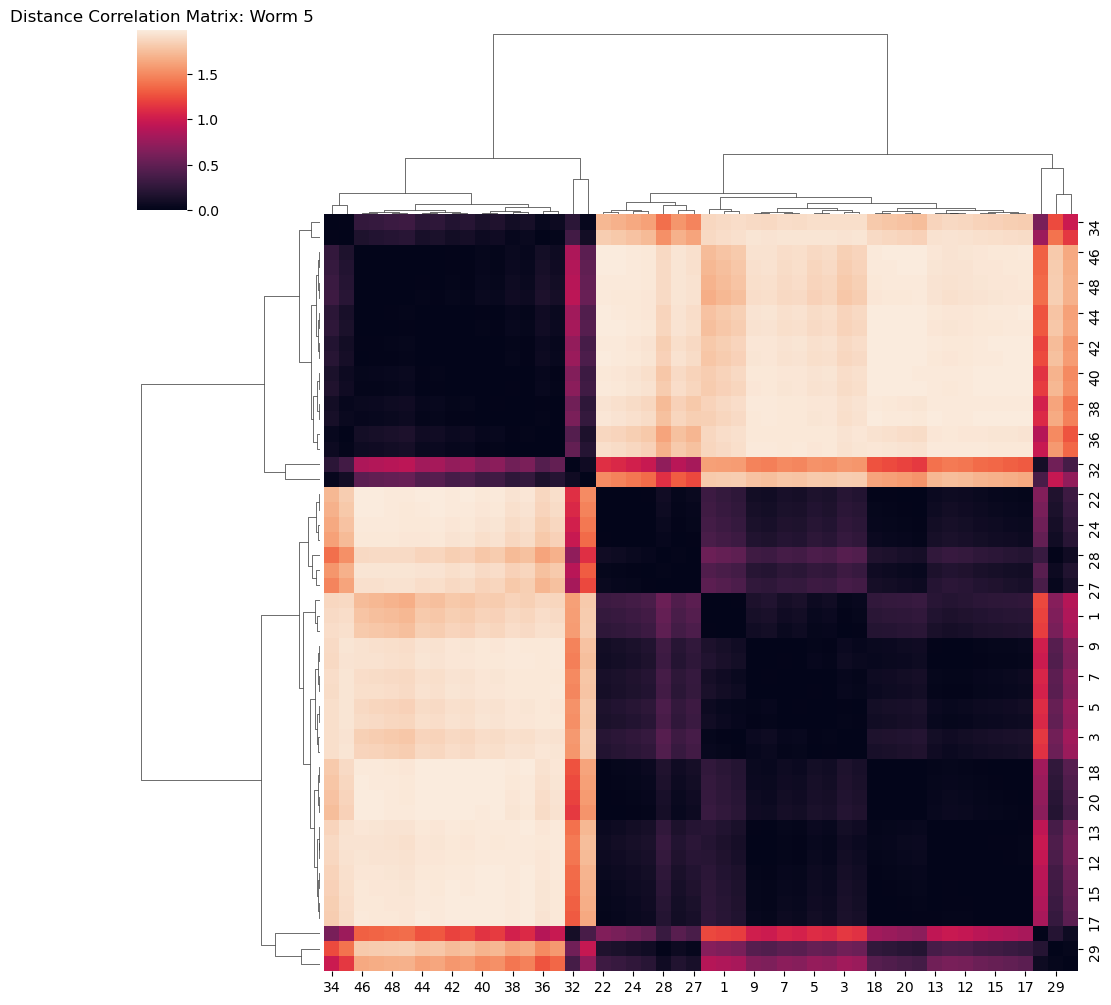

In [77]:

num_columns = response_op['arr_5'].shape[1]

worm_5 = np.zeros((num_columns, 50))

for i in range(num_columns):
    stimulus = signal_op['arr_5'][:, 0]
    response = response_op['arr_5'][:, i]
    sta_result = sta(stimulus, response, window_size= 50)  # window_size needs to be defined or passed
    worm_5[i, :] = sta_result

worm_5_df = pd.DataFrame(worm_5)
worm_5_corr = worm_5_df.corr(method='pearson')
worm_5_distance_corr = 1- worm_5_corr

sns.clustermap(worm_5_distance_corr)
plt.title('Distance Correlation Matrix: Worm 5')